<a href="https://colab.research.google.com/github/fabioTowers/projetos_data_science/blob/master/hong_kong_airbnb_e_covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise dos Dados do Airbnb - Hong Kong

Se você tinha planos de viajar, certamente desde o final de dezembro de 2019 a China muito provavelmente não estava nos seus planos. Isso se deve a descobreta do **novo coronavírus** que foi descoberto na cidade chinesa de Wuhan em [31 de dezembro de 2019](https://coronavirus.saude.gov.br/), desde então a [OMS já classificou o surto de casos do COVID-19 como uma pandemia](https://www.uol.com.br/vivabem/noticias/redacao/2020/03/11/coronavirus-oms-decreta-pandemia-mas-o-que-isso-muda.htm).

Nesse notebook pretendo explorar os dados que o Airbnb disponibiliza pelo portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), para a cidade de Hong Kong, entender quais os dados são disponibilizados e de quais formas pode-se trabalhar com eles, e quais possíveis insights podem ser extraídos por meio dessa análise e se é possível verificar algum impacto do COVID-19 por meio dos dados.

***
Aproveite pra dar uma olhada no [meu perfil no Medium](https://medium.com/@fabiomendes_95615), lá você encontra o artigo sobre esse notebook.

No [meu Github](https://github.com/fabioTowers) você pode encontrar outros projetos e trabalhos.

E no [meu perfil do LinkedIn](https://www.linkedin.com/in/fabio-mendes-35743b128) pode ver a minha trajetória profissional.
***

## Obtenção dos Dados


In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

O site [Inside Airbnb](http://insideairbnb.com/get-the-data.html) disponibiliza diversos arquivos de dados para análise, nesse trabalho inicial eu escolhi o arquivo *listings.csv*, que é uma versão resumida dos dados disponibilizados. No trecho de código abaixo estou importando o dataset:

* `df_13_1_20`: Dataset de dados compilados em 13 de Janeiro de 2020;

In [0]:
# importar o arquivo listings.csv para um DataFrame
df_13_1_20 = pd.read_csv("http://data.insideairbnb.com/china/hk/hong-kong/2020-01-13/visualisations/listings.csv")

## Análise dos Dados


O primeiro passo é verificar como as informações estão armazenadas no dataset, para isso utilizo o comando abaixo:

In [0]:
# mostrar as 3 primeiras entradas
df_13_1_20.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,69074,Beautiful oasis of plants & art @ best location,160139,Amy,NaN,Central & Western,22.28352,114.15018,Entire home/apt,1399,3,133,2019-10-05,1.23,1,153
1,103760,Central Centre 5 min walk to/from Central MTR,304876,Brend,NaN,Central & Western,22.28407,114.15570,Entire home/apt,847,2,268,2019-11-17,2.57,12,359
2,132773,Fabulous 2 Bdrm Aprt Open kitchen,304876,Brend,NaN,Central & Western,22.28868,114.14494,Entire home/apt,1049,2,292,2020-01-10,2.82,12,327


**Dicionário das variáveis**

* `id` - número gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número gerado para identificar o proprietário (anfitrião) da propriedade
* `host_name` - nome do anfitrião
* `neighbourhood_group` - não contém valores válidos
* `neighbourhood` - nome do bairro
* `latitude` - coordenada de latitude da propriedade
* `longitude` - coordenada de longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_mounth` - quantidade de reviws por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `avalability_365` - número de dias de disponibilidade dentro de 365 dias


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Para manipular os dados corretamente é essencial saber em quais formatos eles estão armazenados, no código abaixo é possível ver a quantidade de dados disponíveis e os tipos de cada entrada.

In [0]:
# identificar o volume de dados do DataFrame
print("Variàveis:\t %i" % df_13_1_20.shape[0])
print("Entradas:\t %i\n" % df_13_1_20.shape[1])

display(df_13_1_20.dtypes)


Variàveis:	 12347
Entradas:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Contabilizar os valores ausentes é muito importante para entender a integridade do seu conjunto de dados e como isso pode limitar as análises.

In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df_13_1_20.isnull().sum() / df_13_1_20.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.341135
last_review                       0.341135
host_name                         0.001296
name                              0.000648
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f45b51753c8>,
      dtype=object)

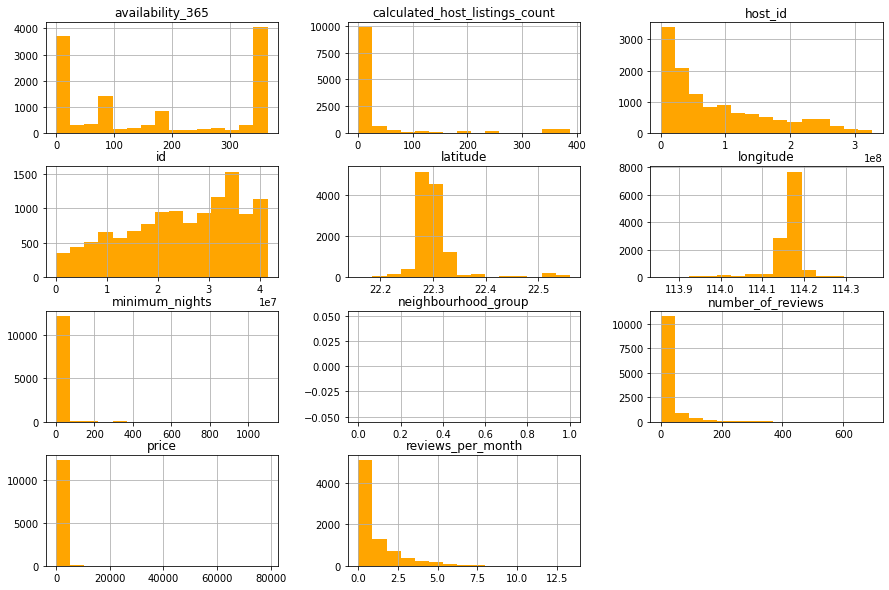

In [0]:
# plotar o histograma das variáveis numéricas
df_13_1_20.hist(bins=15, figsize=(15,10), color="orange")

### **Q4. Qual a correlação existente entre as variáveis**

In [0]:
# criar uma matriz de correlação
matriz_correlacao = df_13_1_20[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
matriz_correlacao

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.020326,-0.011504,-0.028347,-0.083856,-0.036025
minimum_nights,-0.020326,1.000000,-0.105536,-0.081462,0.265766,0.179043
number_of_reviews,-0.011504,-0.105536,1.000000,0.757069,-0.150713,0.023554
reviews_per_month,-0.028347,-0.081462,0.757069,1.000000,-0.060968,0.079591
calculated_host_listings_count,-0.083856,0.265766,-0.150713,-0.060968,1.000000,0.425553
availability_365,-0.036025,0.179043,0.023554,0.079591,0.425553,1.000000


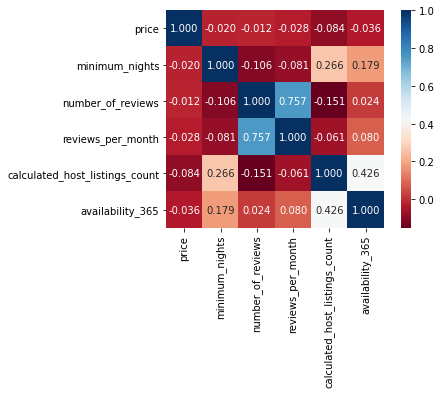

In [0]:
# plotar um heatmap a partir das correlações
sns.heatmap(matriz_correlacao, cmap='RdBu', fmt='.3f', square=True, linecolor='white', annot=True)

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_13_1_20.room_type.value_counts()

Entire home/apt    5723
Private room       5689
Shared room         679
Hotel room          256
Name: room_type, dtype: int64

In [0]:
# ver a média da coluna `price``
df_hk_one.price.mean()

739.7268162306633

In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_13_1_20.room_type.value_counts() / df_13_1_20.shape[0]

Entire home/apt    0.463513
Private room       0.460760
Shared room        0.054993
Hotel room         0.020734
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**

Essa é uma informação que deve ser análisada com cautela. Os imóveis são divididos em regiões (coluna `neighbourhood` do dataset), analisar apenas o preço pode nos levar a uma informação errada, por isso devemos levar em consideração também a quantidade de imóveis em cada localidade, que é apresentada abaixo:

In [0]:
# ver preços por bairros, na média
df_13_1_20.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Southern             1969.943925
Tai Po               1934.824561
Tsuen Wan            1378.164557
Kwun Tong             927.049180
Kwai Tsing            917.513514
Kowloon City          862.472165
Central & Western     788.810208
Islands               775.312741
Yau Tsim Mong         712.940412
Sai Kung              705.773585
Wan Chai              681.767349
Sha Tin               677.301587
Eastern               632.951100
Yuen Long             616.014218
North                 595.527897
Wong Tai Sin          554.916667
Tuen Mun              476.404255
Sham Shui Po          429.849650
Name: price, dtype: float64

In [0]:
# mostrar a quantidades de imóveis em cada localidade
df_13_1_20.neighbourhood.value_counts()

Yau Tsim Mong        4615
Central & Western    2645
Wan Chai             2248
Islands               518
Kowloon City          485
Eastern               409
Sham Shui Po          286
North                 233
Yuen Long             211
Sai Kung              159
Sha Tin               126
Southern              107
Tsuen Wan              79
Kwun Tong              61
Tai Po                 57
Tuen Mun               47
Kwai Tsing             37
Wong Tai Sin           24
Name: neighbourhood, dtype: int64

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

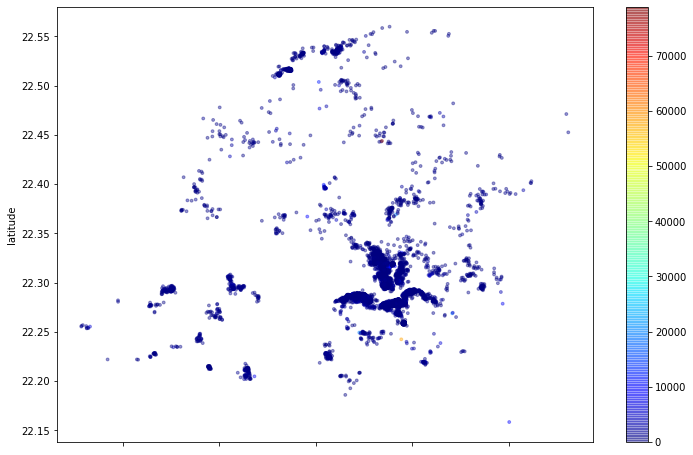

In [0]:
# plotar os imóveis pela latitude-longitude
df_13_1_20.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_13_1_20['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

Outra possibilidade de utilizar os dados de latitude e longitude é plotando o diagrama de dispersão sobre um mapa, é possível aproximar o mapa para focalizar a região onde Hong Kong se encontra e ao passar o mouse sobre os pontos ver a localidade, o preço e as coordenadas de cada ponto, devido a falta de detalhes do mapa não é possivel ver as ilhas onde alguns imóveis se encontram.

In [0]:
import plotly.offline as py
import plotly.graph_objs as go

df = df_13_1_20 #Fazendo uma cópia do dataframe
df['text'] = df['neighbourhood'] + 'Price: ' + df['price'].astype(str)

fig = go.Figure(data=go.Scattergeo(
        lon = df['longitude'],
        lat = df['latitude'],
        text = df['text'],
        mode = 'markers',
        marker_color = 'red'
        ))

fig.update_layout(
        title = 'Imóveis disponíveis no Airbnb em Hong Kong',
        geo_scope='asia'
    )
fig.show()

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [0]:
# ver a média da coluna `minimum_nights``
df_13_1_20.minimum_nights.mean()

8.959180367700656

## **Hong Kong, Airbnb e COVID-19**

Com tudo que foi mostrado acima é possível ter uma ideia das diversas formas que podemos trabalhar com os dados do Airbnb. Mas voltando a questão inicial: É possível, de alguma forma, por meio desses dados, analisar o impacto do COVID-19 em Hong Kong? É isso que veremos abaixo:

### **Importando um novo dataset**

Não seria muito prudente comparar os dados compilados em 13 de Janeiro de 2020 com os dados do mês anterior (compilados em 13 de Dezembro de 2019), isso porque faz parte do calendário chinês a [comemoração do ano novo Internacional](https://ltl-chines.com/feriados-nacionais-chineses/), e como todos sabem, Hong Kong atrai turistas do mundo todo. Ainda de acordo com o calendário chinês não há nenhum feriado nacional no mês de dezembro, logo, é compreensível que haja um aumento no turismo em Janeiro comparado com dezembro.


Por essas razões vou comparar os dados de Janeiro de 2020 (nomeados nesse notebook como `df_13_1_20`) com os dados compilados em Janeiro de 2019 (`df_16_1_19`), é muito comum em estatística analisar dados da mesma época em diferentes anos.

Uma observação importante é que o formato e estrutura esse dataset é idêntico ao que foi analisado nesse notebook, mudando apenas a data de compilação.

In [0]:
# importar o arquivo listings.csv para um DataFrame
df_16_1_19 = pd.read_csv("http://data.insideairbnb.com/china/hk/hong-kong/2019-01-16/visualisations/listings.csv")

Assim como citei na análise dos preços, antes de fazer comparações é importante saber a quatidade de registros nos dois datasets para evitar distorções, e isso é mostrado abaixo:

In [0]:
# identificar o volume de dados do DataFrame
print("Variàveis:\t %i" % df_13_1_20.shape[0])
print("Entradas:\t %i\tDados compilados em 13 de Janeiro de 2020\n" % df_13_1_20.shape[1])

print("Variàveis:\t %i" % df_16_1_19.shape[0])
print("Entradas:\t %i\tDados compilados em 16 de Janeiro de 2019\n" % df_16_1_19.shape[1])

Variàveis:	 12347
Entradas:	 16	Dados compilados em 13 de Janeiro de 2020

Variàveis:	 10477
Entradas:	 16	Dados compilados em 16 de Janeiro de 2019



Dada a grande popuridade da plataforma Airbnb é natural que no período de 1 ano notar um crescimento no número de *hosts*, vamos ver o percentual desse aumento:

In [0]:
print("Aumento no total de anfitriões entre 16/01/19 e 13/01/20: %.2f%%" % (( (df_13_1_20.shape[0] - df_16_1_19.shape[0]) *100 )/df_16_1_19.shape[0]) )

Aumento no total de anfitriões entre 16/01/19 e 13/01/20: 17.85%


Dentre as entradas disponíveis nos datasets (descritas no início como dicionário de variáveis), uma das mais interessantes para essa análise é a `last_review`, isso por que mostra a última data em que uma acomodação recebeu uma opinião de um cliente.
***

Nos trechos abaixo eu percorri os valores da coluna `last_review` filtrando apenas pelos registros que começam pelo com a data que quero filtrar, ao achar um registro de se enquadre no padrão atribuo a uma nova coluna do dataset o valor *true*, com isso posso filtrar os registros apenas para um mês, por exemplo, e comparar os números:

In [0]:
# O imóveis que tiveram seus últimos reviews nas datas que seguem:

df_jan_19 = df_16_1_19 # Fazendo uma cópia do dataset de Janeiro de 2019

# Filtrando os registros para obter apenas os imóveis que tiveram o último review em janeiro de 2019 (de dia 1 a dia 16)
df_jan_19['col_2019'] = df_jan_19.last_review.str.startswith(("2019-01"))
df_jan_19.query("col_2019==True").last_review.value_counts()

2019-01-01    635
2019-01-02    434
2019-01-13    191
2019-01-03    135
2019-01-12    133
2019-01-14    126
2019-01-11    111
2019-01-06    108
2019-01-10    107
2019-01-04     99
2019-01-15     96
2019-01-09     92
2019-01-07     90
2019-01-05     75
2019-01-08     73
2019-01-16     42
Name: last_review, dtype: int64

Os imóveis que tiveram seu último review nos 16 dias listados somam 2547. Esse total dividido pelos 16 dias listados dão uma média de 159 reviews por dia.

É interessante notar ainda a quantidade de imóveis que tiveram seu último review antes da data de compilação dos dados nos dias 1 e 2 de Janeiro, considerando que na China a comemoração no Ano Novo Internacional é um feriado nacional, e que a cidade atrai muitos turistas, esses dados refletem um aumento esperado no movimento.
***

Vejamos agora a mesma análise para os dados compilados em 13 de Janeiro de 2020:

In [0]:
# O imóveis que tiveram seus últimos reviews nas datas que seguem:

df_jan_20 = df_13_1_20 # Fazendo uma cópia do dataset de Janeiro de 2020

# Filtrando os registros para obter apenas os imóveis que tiveram o último review em janeiro de 2020 (de dia 1 a dia 13)
df_jan_20['col_2020'] = df_jan_20.last_review.str.startswith(("2020-01"))
df_jan_20.query("col_2020==True").last_review.value_counts()

2020-01-01    124
2020-01-02    116
2020-01-04     54
2020-01-05     50
2020-01-03     49
2020-01-06     46
2020-01-08     44
2020-01-10     40
2020-01-12     37
2020-01-11     33
2020-01-09     28
2020-01-07     25
2020-01-13     18
Name: last_review, dtype: int64

Os imóveis que tiveram seu último review nos 13 dias listados somam 664. Esse total dividido pelos 13 dias listados dão uma média de 51 reviews por dia.

É possível notar uma grande queda quando comparamos os dois meses, em uma época em que se espera uma alta no movimento turístico, que nesse ano enfrentou o impacto de uma pandemia. É interessante também notar que a diferença no número de registros dos datasets é de mais de 15% ainda assim a análise mostra uma queda consideravel.

## Conclusões


Esse meu primeiro notebook é apenas uma análise inicial, com foco em aprender os conceitos iniciais de manipulação de conjuntos de dados e mostrar uma visão geral do que é possível fazer com esses dados, aplicando alguns conceitos aprendidos no curso [data science na prática](https://sigmoidal.ai/tag/data-science-na-pratica/), pretendo futuramente aprofundar essa análise.